In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import TensorDataset
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install torch torchvision matplotlib tqdm

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Neuro/Dataset_with_Trial_IDs (1).csv")

<ipython-input-4-5d112fe85b96>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Neuro/Dataset_with_Trial_IDs (1).csv")


In [ ]:
data.head(5)

,timestamp,cursor_pos,cursor_pos.1,eye_pos,eye_pos.1,hand_pos,hand_pos.1,hand_vel,hand_vel.1,spikes,...,spikes.133,spikes.134,spikes.135,spikes.136,spikes.137,spikes.138,spikes.139,spikes.140,spikes.141,trial_id
0,0.000,x,y,x,y,x,y,x,y,1011.0,...,2792.0,2801.0,2802.0,2812.0,2821.0,2841.0,2842.0,2861.0,2951.0,0
1,0.001,-2.445708618379075,1.8065088368179838,-6.421205432173423,-3.32822204584011,-2.4405554624695927,-19.139818095914062,1.4558510204171045,-7.24352780814687,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.002,-4.355809171967876,3.254141150437025,-11.175378707559513,-6.648509404180358,-4.40853879540083,-34.699939160532125,2.466626500709493,-13.737303750019215,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.003,-3.806003535898849,2.7645346453592574,-9.97940827057744,-5.538807029624762,-3.858295468876917,-30.52783519273484,1.3050498309123895,-11.606274596470566,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.004,-4.131651046760463,2.992293143066401,-10.582643874251966,-6.063008450465178,-4.173919478547863,-33.0875729073394,0.06125063353368079,-11.42601324323032,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Final shape: (2580350, 50, 2)


In [ ]:
import pandas as pd
import numpy as np

# Assume 'df' is your loaded DataFrame
sequence_length = 50
sequences = []

# Forward-fill any NaNs
data[["hand_pos", "hand_pos.1"]] = data[["hand_pos", "hand_pos.1"]].ffill()

# Drop remaining NaNs (e.g., at very beginning)
df = data.dropna(subset=["hand_pos", "hand_pos.1"])

# Extract (x, y) hand positions
coords = df[["hand_pos", "hand_pos.1"]].values

# Create overlapping sequences of shape (50, 2)
for i in range(len(coords) - sequence_length + 1):
    seq = coords[i:i + sequence_length]
    sequences.append(seq)

# Stack into (N, 50, 2)
sequences = np.stack(sequences)
print("Final shape:", sequences.shape)


Final shape: (58686, 50, 2)


In [ ]:
import numpy as np

sequences = np.stack(sequences)  # shape: (num_sequences, sequence_length, 2)

print("Shape of dataset:", sequences.shape)
# Example: (1200, 100, 2)


Shape of dataset: (58686, 50, 2)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split into train/val/test (e.g. 80/10/10)
train, temp = train_test_split(sequences, test_size=0.2, random_state=42)
val, test = train_test_split(temp, test_size=0.5, random_state=42)

# Save as compressed .npz
np.savez_compressed("trajectory_dataset.npz", train=train, val=val, test=test)

print("✅ Dataset saved as trajectory_dataset.npz")


✅ Dataset saved as trajectory_dataset.npz


In [ ]:
# # To load later:
# data = np.load("trajectory_dataset.npz")
# train = data["train"]
# val = data["val"]
# test = data["test"]

print(train[0])  # (N_train, sequence_length, 2)


[[60.85606762112358 -138.3719960971524]
 [64.01651520126421 -137.51501364897155]
 [67.18337889883043 -136.46757840930724]
 [70.38555102784913 -135.2448638753275]
 [73.61242741959869 -133.86250564718722]
 [76.83120105166469 -132.2951465166957]
 [79.98484973384635 -130.52356932744607]
 [83.0153375198503 -128.55436909461258]
 [85.90375484300341 -126.41711825008124]
 [88.63936880184465 -124.149625495027]
 [91.23397598701293 -121.79348201212004]
 [93.7233368048999 -119.36975681532002]
 [96.1339336522558 -116.8533278410731]
 [98.48141940943364 -114.20812574351444]
 [100.76554845463924 -111.4190134448512]
 [102.97117807774684 -108.47434116646694]
 [105.06525462778414 -105.41129027019512]
 [107.01027623537288 -102.28946736087993]
 [108.79036390984272 -99.16078674150148]
 [110.3927864742544 -96.04140834592675]
 [111.83005065952317 -92.91846631531682]
 [113.13971827106168 -89.74942090289211]
 [114.35228199678338 -86.48373307309765]
 [115.48915267004948 -83.10846589985204]
 [116.56058483824852 -7

In [ ]:
# DDPM for 2D Trajectory Generation (pos x, pos y)
# Sequence length: T, Feature dim: 2

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import matplotlib.pyplot as plt

class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, timesteps):
        device = timesteps.device
        half_dim = self.dim // 2
        emb = torch.exp(
            torch.arange(half_dim, device=device) * (-torch.log(torch.tensor(10000.0)) / half_dim)
        )
        emb = timesteps[:, None] * emb[None, :]
        return torch.cat((emb.sin(), emb.cos()), dim=-1)


class TrajectoryUNet(nn.Module):
    def __init__(self, seq_len=100, dim=64):
        super().__init__()
        self.seq_len = seq_len
        self.dim = dim

        self.time_embed = SinusoidalPositionEmbeddings(dim)
        self.input_proj = nn.Linear(2, dim)
        self.net = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, dim),
            nn.ReLU(),
            nn.Linear(dim, dim),
            nn.ReLU(),
            nn.Linear(dim, 2)  # output is noise prediction on (x, y)
        )

    def forward(self, x, t):
        # x: (B, T, 2), t: (B,)
        time_emb = self.time_embed(t)  # (B, dim)
        time_emb = time_emb[:, None, :].expand(-1, x.size(1), -1)  # (B, T, dim)

        x = self.input_proj(x) + time_emb  # (B, T, dim)
        x = self.net(x)  # (B, T, 2)
        return x


class GaussianDiffusion(nn.Module):
    def __init__(self, model, timesteps=1000, beta_start=1e-4, beta_end=0.02):
        super().__init__()
        self.model = model
        self.timesteps = timesteps

        betas = torch.linspace(beta_start, beta_end, timesteps)
        self.register_buffer('betas', betas)
        self.register_buffer('alphas', 1. - betas)
        self.register_buffer('alphas_cumprod', torch.cumprod(1. - betas, dim=0))

    def q_sample(self, x_start, t, noise=None):
        if noise is None:
            noise = torch.randn_like(x_start)
        sqrt_alphas_cumprod = torch.sqrt(self.alphas_cumprod[t])[:, None, None]
        sqrt_one_minus = torch.sqrt(1 - self.alphas_cumprod[t])[:, None, None]
        return sqrt_alphas_cumprod * x_start + sqrt_one_minus * noise

    def p_losses(self, x_start, t):
        noise = torch.randn_like(x_start)
        x_noisy = self.q_sample(x_start=x_start, t=t, noise=noise)
        predicted_noise = self.model(x_noisy, t)
        return F.mse_loss(predicted_noise, noise)

    def sample(self, shape, device):
        x = torch.randn(shape, device=device)
        for t in reversed(range(self.timesteps)):
            t_batch = torch.full((shape[0],), t, device=device, dtype=torch.long)
            predicted_noise = self.model(x, t_batch)
            beta_t = self.betas[t]
            alpha_t = self.alphas[t]
            alpha_bar_t = self.alphas_cumprod[t]

            x = (1 / torch.sqrt(alpha_t)) * (x - beta_t / torch.sqrt(1 - alpha_bar_t) * predicted_noise)
            if t > 0:
                noise = torch.randn_like(x)
                x += torch.sqrt(beta_t) * noise
        return x





In [ ]:
data = np.load("trajectory_dataset.npz")
train_data = torch.tensor(data["train"], dtype=torch.float32)
val_data = torch.tensor(data["val"], dtype=torch.float32)
test_data = torch.tensor(data["test"], dtype=torch.float32)


NameError: name 'batch_size' is not defined

In [ ]:
batch_size = 32
train_loader = DataLoader(TensorDataset(train_data), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(val_data), batch_size=batch_size)

In [ ]:
next(iter(train_loader))

[tensor([[[ 0.2218,  2.0972],
          [-1.2328, -0.9208],
          [ 0.2211,  2.0975],
          ...,
          [ 0.2219,  2.0936],
          [-1.2323, -0.9212],
          [-1.2317, -0.9215]],
 
         [[ 0.3136,  0.4787],
          [ 0.7405,  0.3416],
          [ 0.3132,  0.4788],
          ...,
          [ 0.7411,  0.3406],
          [ 0.3132,  0.4788],
          [ 0.7407,  0.3415]],
 
         [[-0.0899, -0.1644],
          [ 0.1333, -0.3813],
          [-0.0990, -0.1791],
          ...,
          [ 0.1906, -0.2706],
          [-0.0948, -0.6216],
          [ 0.1908, -0.2697]],
 
         ...,
 
         [[ 1.8158, -0.3009],
          [ 1.5300, -0.3460],
          [ 1.5294, -0.3465],
          ...,
          [ 1.5276, -0.3463],
          [ 1.5272, -0.3459],
          [ 1.7742, -0.3275]],
 
         [[ 2.1181,  1.1570],
          [ 2.1181,  1.1581],
          [ 2.3976,  1.6734],
          ...,
          [ 2.4086,  1.6667],
          [ 2.1372,  1.1902],
          [ 2.1385,  1.1897

In [ ]:
def train_ddpm(model, dataset_path="trajectory_dataset.npz", epochs=20, batch_size=32, lr=1e-4, device="cuda"):


    diffusion = GaussianDiffusion(model).to(device)
    optimizer = torch.optim.Adam(diffusion.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            x = batch[0].to(device)
            t = torch.randint(0, diffusion.timesteps, (x.size(0),), device=device).long()
            loss = diffusion.p_losses(x, t)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_loss:.4f}")

    # Optional: Evaluate on test data
    model.eval()
    test_loader = DataLoader(TensorDataset(test_data), batch_size=batch_size)
    with torch.no_grad():
        test_loss = 0
        for batch in test_loader:
            x = batch[0].to(device)
            t = torch.randint(0, diffusion.timesteps, (x.size(0),), device=device).long()
            loss = diffusion.p_losses(x, t)
            test_loss += loss.item()

        print(f"Test Loss: {test_loss / len(test_loader):.4f}")

    return diffusion


In [ ]:
# --- Example usage ---
if __name__ == "__main__":
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = TrajectoryUNet()
    trained_diffusion = train_ddpm(model, device=device)

    # Sampling and plotting
    samples = trained_diffusion.sample((4, 100, 2), device=device)
    for i in range(4):
        plt.plot(samples[i, :, 0].cpu(), samples[i, :, 1].cpu())
        plt.title(f"Generated Trajectory {i+1}")
        plt.xlabel("pos x")
        plt.ylabel("pos y")
        plt.grid(True)
        plt.show()

KeyboardInterrupt: 

In [ ]:
import numpy as np

data = np.load("trajectory_dataset.npz")
for split in ["train", "val", "test"]:
    arr = data[split]
    print(f"{split} shape: {arr.shape}")
    print(f"{split} contains NaN:", np.isnan(arr).any())
    print(f"{split} contains Inf:", np.isinf(arr).any())
    print(f"{split} max:", np.max(arr), "min:", np.min(arr))


train shape: (2064280, 50, 2)
train contains NaN: False
train contains Inf: False
train max: 3.19282816454486 min: -3.2071274363778772
val shape: (258035, 50, 2)
val contains NaN: False
val contains Inf: False
val max: 3.19282816454486 min: -3.2071274363778772
test shape: (258035, 50, 2)
test contains NaN: False
test contains Inf: False
test max: 3.19282816454486 min: -3.2071274363778772


In [ ]:
# DDPM for 2D Trajectory Generation (pos x, pos y)
# Sequence length: T, Feature dim: 2

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import matplotlib.pyplot as plt

class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, timesteps):
        device = timesteps.device
        half_dim = self.dim // 2
        emb = torch.exp(
            torch.arange(half_dim, device=device) * (-torch.log(torch.tensor(10000.0)) / half_dim)
        )
        emb = timesteps[:, None] * emb[None, :]
        return torch.cat((emb.sin(), emb.cos()), dim=-1)


class TrajectoryUNet(nn.Module):
    def __init__(self, seq_len=100, dim=64):
        super().__init__()
        self.seq_len = seq_len
        self.dim = dim

        self.time_embed = SinusoidalPositionEmbeddings(dim)
        self.input_proj = nn.Linear(2, dim)
        self.net = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, dim),
            nn.ReLU(),
            nn.Linear(dim, dim),
            nn.ReLU(),
            nn.Linear(dim, 2)  # output is noise prediction on (x, y)
        )

    def forward(self, x, t):
        time_emb = self.time_embed(t)
        time_emb = time_emb[:, None, :].expand(-1, x.size(1), -1)
        x = self.input_proj(x) + time_emb
        x = self.net(x)
        return x


class GaussianDiffusion(nn.Module):
    def __init__(self, model, timesteps=1000, beta_start=1e-4, beta_end=0.02):
        super().__init__()
        self.model = model
        self.timesteps = timesteps

        betas = torch.linspace(beta_start, beta_end, timesteps)
        self.register_buffer('betas', betas)
        self.register_buffer('alphas', 1. - betas)
        self.register_buffer('alphas_cumprod', torch.cumprod(1. - betas, dim=0))

    def q_sample(self, x_start, t, noise=None):
        if noise is None:
            noise = torch.randn_like(x_start)
        sqrt_alphas_cumprod = torch.sqrt(torch.clamp(self.alphas_cumprod[t], min=1e-5))[:, None, None]
        sqrt_one_minus = torch.sqrt(torch.clamp(1 - self.alphas_cumprod[t], min=1e-5))[:, None, None]
        return sqrt_alphas_cumprod * x_start + sqrt_one_minus * noise

    def p_losses(self, x_start, t):
        noise = torch.randn_like(x_start)
        x_noisy = self.q_sample(x_start=x_start, t=t, noise=noise)
        predicted_noise = self.model(x_noisy, t)
        return F.mse_loss(predicted_noise, noise)

    def sample(self, shape, device):
        x = torch.randn(shape, device=device)
        for t in reversed(range(self.timesteps)):
            t_batch = torch.full((shape[0],), t, device=device, dtype=torch.long)
            predicted_noise = self.model(x, t_batch)
            beta_t = self.betas[t]
            alpha_t = self.alphas[t]
            alpha_bar_t = self.alphas_cumprod[t]

            x = (1 / torch.sqrt(torch.clamp(alpha_t, min=1e-5))) * (
                x - beta_t / torch.sqrt(torch.clamp(1 - alpha_bar_t, min=1e-5)) * predicted_noise
            )
            if t > 0:
                noise = torch.randn_like(x)
                x += torch.sqrt(torch.clamp(beta_t, min=1e-5)) * noise
        return x


# --- Training Code ---
def train_ddpm(model, dataset_path="trajectory_dataset.npz", epochs=20, batch_size=32, lr=1e-4, device="cuda"):
    data = np.load(dataset_path)
    train_data = torch.tensor(data["train"], dtype=torch.float32)
    val_data = torch.tensor(data["val"], dtype=torch.float32)
    test_data = torch.tensor(data["test"], dtype=torch.float32)

    train_loader = DataLoader(TensorDataset(train_data), batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(TensorDataset(val_data), batch_size=batch_size)

    diffusion = GaussianDiffusion(model).to(device)
    optimizer = torch.optim.Adam(diffusion.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            x = batch[0].to(device)
            t = torch.randint(0, diffusion.timesteps, (x.size(0),), device=device).long()
            loss = diffusion.p_losses(x, t)

            if torch.isnan(loss):
                print("⚠️ NaN loss detected. Skipping batch.")
                continue

            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / max(len(train_loader), 1)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_loss:.4f}")

    model.eval()
    test_loader = DataLoader(TensorDataset(test_data), batch_size=batch_size)
    with torch.no_grad():
        test_loss = 0
        for batch in test_loader:
            x = batch[0].to(device)
            t = torch.randint(0, diffusion.timesteps, (x.size(0),), device=device).long()
            loss = diffusion.p_losses(x, t)
            test_loss += loss.item()

        print(f"Test Loss: {test_loss / max(len(test_loader), 1):.4f}")

    return diffusion


# --- Example usage ---
if __name__ == "__main__":
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = TrajectoryUNet()
    trained_diffusion = train_ddpm(model, device=device)

    # Sampling and plotting
    samples = trained_diffusion.sample((4, 100, 2), device=device)
    for i in range(4):
        plt.plot(samples[i, :, 0].cpu(), samples[i, :, 1].cpu())
        plt.title(f"Generated Trajectory {i+1}")
        plt.xlabel("pos x")
        plt.ylabel("pos y")
        plt.grid(True)
        plt.show()


Epoch 1/20, Train Loss: 0.2748
Epoch 2/20, Train Loss: 0.2712
Epoch 3/20, Train Loss: 0.2707
Epoch 4/20, Train Loss: 0.2708
Epoch 5/20, Train Loss: 0.2712
Epoch 6/20, Train Loss: 0.2704
Epoch 7/20, Train Loss: 0.2702
Epoch 8/20, Train Loss: 0.2703
Epoch 9/20, Train Loss: 0.2705
Epoch 10/20, Train Loss: 0.2700
Epoch 11/20, Train Loss: 0.2704
Epoch 12/20, Train Loss: 0.2706
Epoch 13/20, Train Loss: 0.2701
Epoch 14/20, Train Loss: 0.2701
Epoch 15/20, Train Loss: 0.2700
Epoch 16/20, Train Loss: 0.2703


KeyboardInterrupt: 

In [ ]:
torch.save({
    'model_state_dict': model.state_dict()
    'diffusion_state_dict': diffusion.state_dict()
}, '/content/drive/MyDrive/Neuro/Model/trained_model.pth')

MODEL

In [ ]:
print("Using device:", device)

NameError: name 'device' is not defined

In [ ]:
# DDPM for 2D Trajectory Generation (pos x, pos y)
# Sequence length: T, Feature dim: 2

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import matplotlib.pyplot as plt
import os

class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, timesteps):
        device = timesteps.device
        half_dim = self.dim // 2
        emb = torch.exp(
            torch.arange(half_dim, device=device) * (-torch.log(torch.tensor(10000.0)) / half_dim)
        )
        emb = timesteps[:, None] * emb[None, :]
        return torch.cat((emb.sin(), emb.cos()), dim=-1)


class TrajectoryUNet(nn.Module):
    def __init__(self, seq_len=100, dim=64):
        super().__init__()
        self.seq_len = seq_len
        self.dim = dim

        self.time_embed = SinusoidalPositionEmbeddings(dim)
        self.input_proj = nn.Linear(2, dim)
        self.net = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, dim),
            nn.ReLU(),
            nn.Linear(dim, dim),
            nn.ReLU(),
            nn.Linear(dim, 2)  # output is noise prediction on (x, y)
        )

    def forward(self, x, t):
        time_emb = self.time_embed(t)
        time_emb = time_emb[:, None, :].expand(-1, x.size(1), -1)
        x = self.input_proj(x) + time_emb
        x = self.net(x)
        return x


class GaussianDiffusion(nn.Module):
    def __init__(self, model, timesteps=1000, beta_start=1e-4, beta_end=0.02):
        super().__init__()
        self.model = model
        self.timesteps = timesteps

        betas = torch.linspace(beta_start, beta_end, timesteps)
        self.register_buffer('betas', betas)
        self.register_buffer('alphas', 1. - betas)
        self.register_buffer('alphas_cumprod', torch.cumprod(1. - betas, dim=0))

    def q_sample(self, x_start, t, noise=None):
        if noise is None:
            noise = torch.randn_like(x_start)
        sqrt_alphas_cumprod = torch.sqrt(torch.clamp(self.alphas_cumprod[t], min=1e-5))[:, None, None]
        sqrt_one_minus = torch.sqrt(torch.clamp(1 - self.alphas_cumprod[t], min=1e-5))[:, None, None]
        return sqrt_alphas_cumprod * x_start + sqrt_one_minus * noise

    def p_losses(self, x_start, t):
        noise = torch.randn_like(x_start)
        x_noisy = self.q_sample(x_start=x_start, t=t, noise=noise)
        predicted_noise = self.model(x_noisy, t)
        return F.mse_loss(predicted_noise, noise)

    def sample(self, shape, device):
        x = torch.randn(shape, device=device)
        for t in reversed(range(self.timesteps)):
            t_batch = torch.full((shape[0],), t, device=device, dtype=torch.long)
            predicted_noise = self.model(x, t_batch)
            beta_t = self.betas[t]
            alpha_t = self.alphas[t]
            alpha_bar_t = self.alphas_cumprod[t]

            x = (1 / torch.sqrt(torch.clamp(alpha_t, min=1e-5))) * (
                x - beta_t / torch.sqrt(torch.clamp(1 - alpha_bar_t, min=1e-5)) * predicted_noise
            )
            if t > 0:
                noise = torch.randn_like(x)
                x += torch.sqrt(torch.clamp(beta_t, min=1e-5)) * noise
        return x


# --- Training Code ---
def train_ddpm(model, dataset_path="trajectory_dataset.npz", epochs=20, batch_size=32, lr=1e-4, device="cuda", save_path="ddpm_model.pt"):
    data = np.load(dataset_path)
    train_data = torch.tensor(data["train"], dtype=torch.float32)
    val_data = torch.tensor(data["val"], dtype=torch.float32)
    test_data = torch.tensor(data["test"], dtype=torch.float32)

    train_loader = DataLoader(TensorDataset(train_data), batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(TensorDataset(val_data), batch_size=batch_size)

    diffusion = GaussianDiffusion(model).to(device)
    optimizer = torch.optim.Adam(diffusion.parameters(), lr=lr)

    best_val_loss = float("inf")
    patience = 5
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            x = batch[0].to(device)
            t = torch.randint(0, diffusion.timesteps, (x.size(0),), device=device).long()
            loss = diffusion.p_losses(x, t)

            if torch.isnan(loss):
                print("⚠️ NaN loss detected. Skipping batch.")
                continue

            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / max(len(train_loader), 1)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_loss:.4f}")

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                x = batch[0].to(device)
                t = torch.randint(0, diffusion.timesteps, (x.size(0),), device=device).long()
                loss = diffusion.p_losses(x, t)
                val_loss += loss.item()

        val_loss /= max(len(val_loader), 1)
        print(f"Epoch {epoch+1}/{epochs}, Val Loss: {val_loss:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save({
                'model_state_dict': model.state_dict(),
                'diffusion_state_dict': diffusion.state_dict()
            }, "/content/drive/MyDrive/Neuro/Model/ddpm_model.pt")
            print(f"✅ Full model saved to {save_path}")
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1} due to no improvement in validation loss.")
                break

    # Test
    test_loader = DataLoader(TensorDataset(test_data), batch_size=batch_size)
    with torch.no_grad():
        test_loss = 0
        for batch in test_loader:
            x = batch[0].to(device)
            t = torch.randint(0, diffusion.timesteps, (x.size(0),), device=device).long()
            loss = diffusion.p_losses(x, t)
            test_loss += loss.item()

        print(f"Test Loss: {test_loss / max(len(test_loader), 1):.4f}")

    return diffusion


# --- Example usage ---
if __name__ == "__main__":
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = TrajectoryUNet()
    trained_diffusion = train_ddpm(model, device=device)

    # Sampling and plotting
    samples = trained_diffusion.sample((4, 100, 2), device=device)
    for i in range(4):
        plt.plot(samples[i, :, 0].cpu(), samples[i, :, 1].cpu())
        plt.title(f"Generated Trajectory {i+1}")
        plt.xlabel("pos x")
        plt.ylabel("pos y")
        plt.grid(True)
        plt.show()


ValueError: Object arrays cannot be loaded when allow_pickle=False

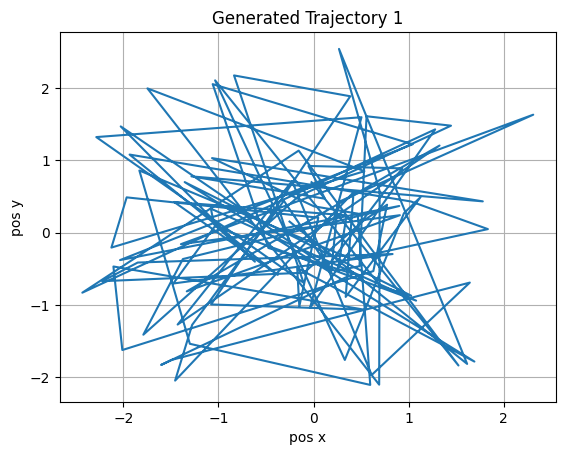

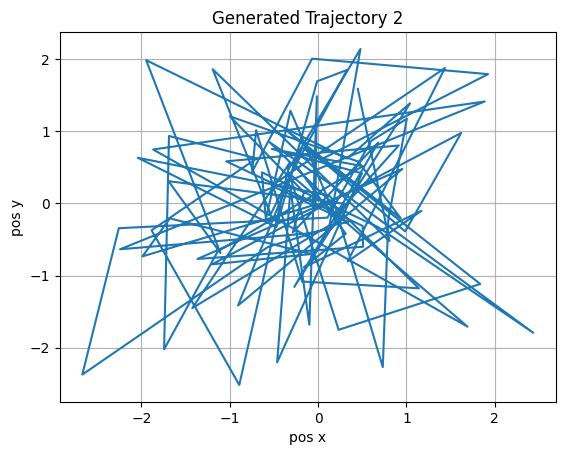

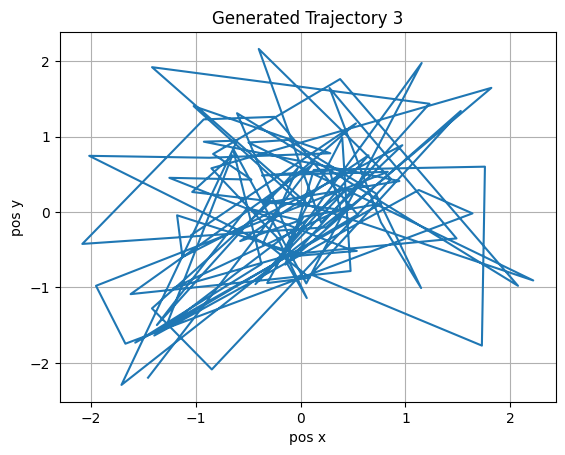

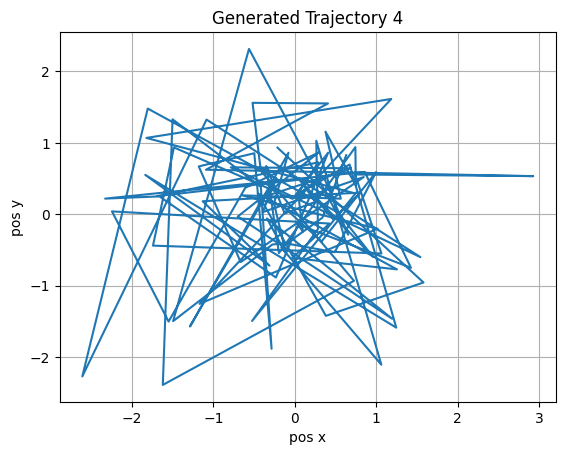

In [ ]:
# Sampling and plotting
samples = trained_diffusion.sample((4, 100, 2), device=device)
for i in range(4):
    plt.plot(samples[i, :, 0].cpu().detach().numpy(), samples[i, :, 1].cpu().detach().numpy()) # Detach the tensor and convert to NumPy
    plt.title(f"Generated Trajectory {i+1}")
    plt.xlabel("pos x")
    plt.ylabel("pos y")
    plt.grid(True)
    plt.show()

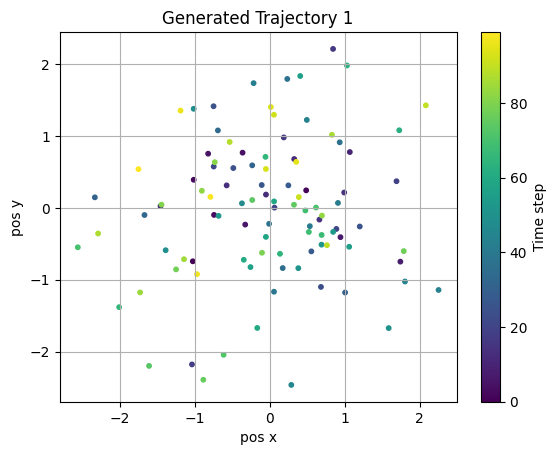

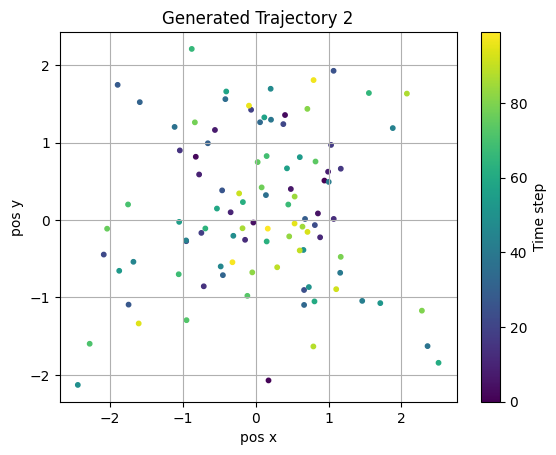

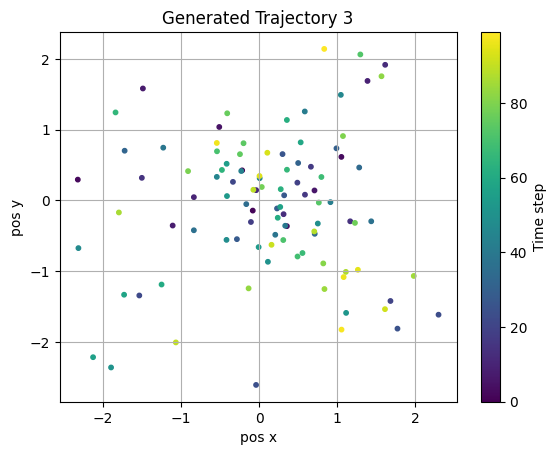

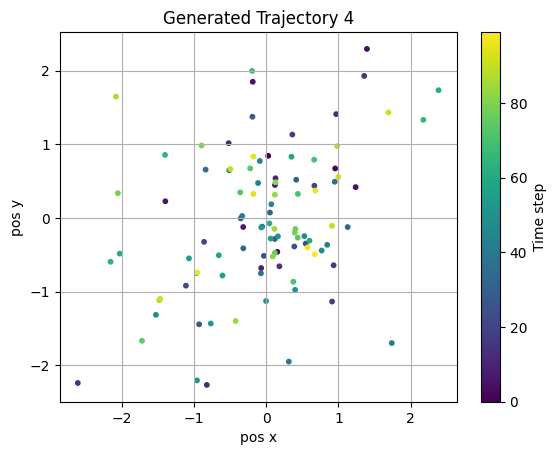

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

samples = trained_diffusion.sample((4, 100, 2), device=device)

for i in range(4):
    x = samples[i, :, 0].cpu().detach().numpy()
    y = samples[i, :, 1].cpu().detach().numpy()
    t = np.arange(len(x))  # Time steps for coloring

    plt.figure()
    scatter = plt.scatter(x, y, c=t, cmap='viridis', s=10)
    plt.colorbar(scatter, label='Time step')
    plt.title(f"Generated Trajectory {i+1}")
    plt.xlabel("pos x")
    plt.ylabel("pos y")
    plt.grid(True)
    plt.show()


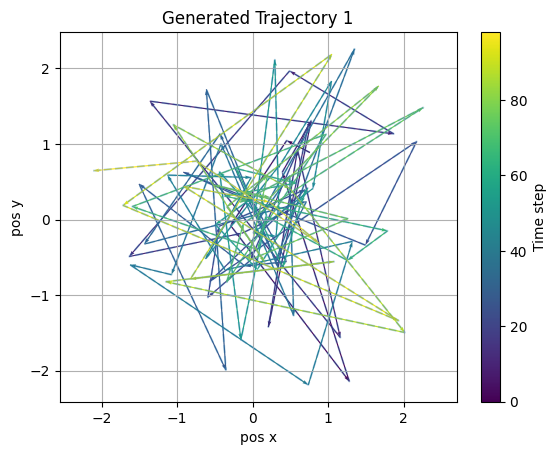

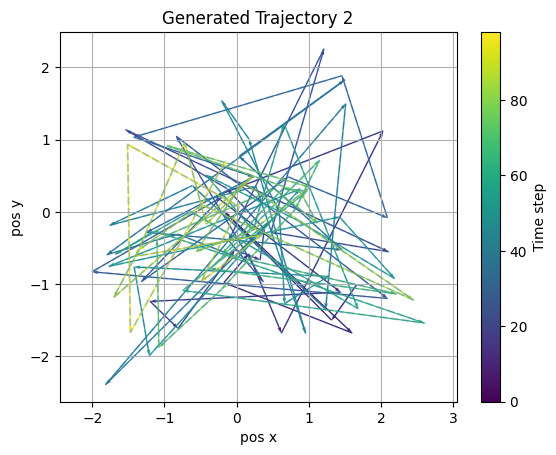

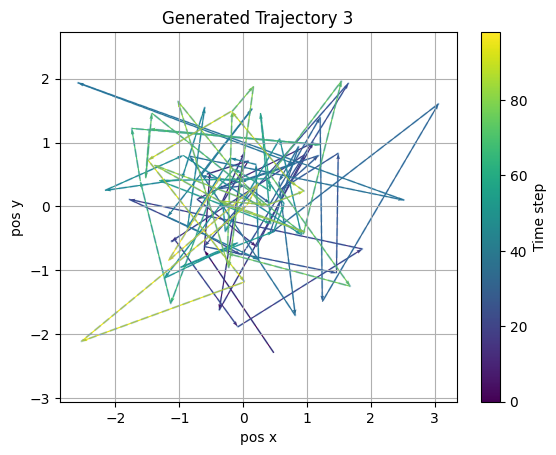

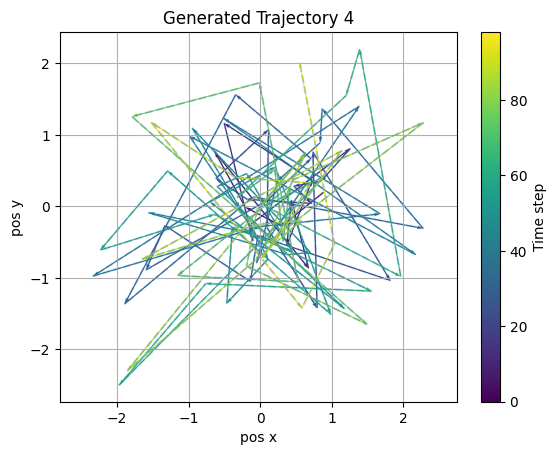

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

samples = trained_diffusion.sample((4, 100, 2), device=device)

for i in range(4):
    x = samples[i, :, 0].cpu().detach().numpy()
    y = samples[i, :, 1].cpu().detach().numpy()

    dx = np.diff(x)
    dy = np.diff(y)

    plt.figure()
    plt.quiver(
        x[:-1], y[:-1], dx, dy,
        np.arange(len(dx)), cmap='viridis', scale_units='xy', angles='xy', scale=1, width=0.003
    )
    plt.plot(x, y, alpha=0.3, linestyle='--')  # optional faded full trajectory line
    plt.colorbar(label='Time step')
    plt.title(f"Generated Trajectory {i+1}")
    plt.xlabel("pos x")
    plt.ylabel("pos y")
    plt.grid(True)
    plt.axis('equal')
    plt.show()


In [ ]:
model = TrajectoryUNet()
diffusion = GaussianDiffusion(model)
checkpoint = torch.load("/content/drive/MyDrive/Neuro/Model/trained_model.pth", map_location=device)

model.load_state_dict(checkpoint["model_state_dict"])
diffusion.load_state_dict(checkpoint["diffusion_state_dict"])
model.to(device)
model.eval()

TrajectoryUNet(
  (time_embed): SinusoidalPositionEmbeddings()
  (input_proj): Linear(in_features=2, out_features=64, bias=True)
  (net): Sequential(
    (0): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=2, bias=True)
  )
)

In [ ]:
# def train_ddpm(model, dataset_path="trajectory_dataset.npz", epochs=20, batch_size=32, lr=1e-4, device="cuda", save_path="ddpm_model.pt"):
data = np.load("/content/trajectory_dataset.npz")
train_data = torch.tensor(data["train"], dtype=torch.float32)
val_data = torch.tensor(data["val"], dtype=torch.float32)
test_data = torch.tensor(data["test"], dtype=torch.float32)

train_loader = DataLoader(TensorDataset(train_data), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(val_data), batch_size=batch_size)

diffusion = GaussianDiffusion(model).to(device)
optimizer = torch.optim.Adam(diffusion.parameters(), lr=lr)

best_val_loss = float("inf")
patience = 5
patience_counter = 0
model = TrajectoryUNet()

device = "cuda" if torch.cuda.is_available() else "cpu"

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        x = batch[0].to(device)
        t = torch.randint(0, diffusion.timesteps, (x.size(0),), device=device).long()
        loss = diffusion.p_losses(x, t)

        if torch.isnan(loss):
            print("⚠️ NaN loss detected. Skipping batch.")
            continue

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / max(len(train_loader), 1)
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_loss:.4f}")

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            x = batch[0].to(device)
            t = torch.randint(0, diffusion.timesteps, (x.size(0),), device=device).long()
            loss = diffusion.p_losses(x, t)
            val_loss += loss.item()

    val_loss /= max(len(val_loader), 1)
    print(f"Epoch {epoch+1}/{epochs}, Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save({
            'model_state_dict': model.state_dict(),
            'diffusion_state_dict': diffusion.state_dict()
        }, "/content/drive/MyDrive/Neuro/Model/trained_model.pth")
        print(f"✅ Full model saved to ")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1} due to no improvement in validation loss.")
            break

# Test
test_loader = DataLoader(TensorDataset(test_data), batch_size=batch_size)
with torch.no_grad():
    test_loss = 0
    for batch in test_loader:
        x = batch[0].to(device)
        t = torch.randint(0, diffusion.timesteps, (x.size(0),), device=device).long()
        loss = diffusion.p_losses(x, t)
        test_loss += loss.item()

    print(f"Test Loss: {test_loss / max(len(test_loader), 1):.4f}")

# return diffusion



# trained_diffusion = train_ddpm(model, device=device)

# Sampling and plotting
samples = diffusion.sample((4, 100, 2), device=device)
for i in range(4):
    plt.plot(samples[i, :, 0].cpu(), samples[i, :, 1].cpu())
    plt.title(f"Generated Trajectory {i+1}")
    plt.xlabel("pos x")
    plt.ylabel("pos y")
    plt.grid(True)
    plt.show()

AttributeError: 'TrajectoryUNet' object has no attribute 'sample'